In [26]:
import pandas as pd

# Load your dataset
# Example: df_1 = pd.read_excel('your_file.xlsx')

# Drop empty columns if needed
df_1.dropna(axis=1, how='all', inplace=True)

# Rename columns (make sure count matches)
df_1.columns = ['unit_number', 'time_in_cycles'] + [f'op_setting_{i}' for i in range(1, 4)] + [f'sensor_{i}' for i in range(1, df_1.shape[1] - 5 + 1)]

# Step 1 & 2: Calculate max cycle per engine and merge to get max_cycle
df_1 = df_1.merge(
    df_1.groupby('unit_number')['time_in_cycles'].max().reset_index().rename(columns={'time_in_cycles': 'max_cycle'}),
    on='unit_number',
    how='left'
)

# Step 3: Calculate RUL and drop max_cycle column
df_1['RUL'] = df_1['max_cycle'] - df_1['time_in_cycles']
df_1.drop('max_cycle', axis=1, inplace=True)

# Identify sensor columns
sensor_cols = [col for col in df_1.columns if col.startswith('sensor_')]

# Sort for rolling calculations
df_1 = df_1.sort_values(['unit_number', 'time_in_cycles'])

# Add rolling mean, std, and diff for each sensor
for col in sensor_cols:
    df_1[f'{col}_rolling_mean'] = df_1.groupby('unit_number')[col].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
    df_1[f'{col}_rolling_std'] = df_1.groupby('unit_number')[col].transform(lambda x: x.rolling(window=5, min_periods=1).std())
    df_1[f'{col}_diff'] = df_1.groupby('unit_number')[col].diff()

# Fill NaN values resulting from rolling std and diff calculations
df_1.fillna(0, inplace=True)


In [26]:
import pandas as pd

# Load your dataset
# Example: df_1 = pd.read_excel('your_file.xlsx')

# Drop empty columns if needed
df_1.dropna(axis=1, how='all', inplace=True)

# Rename columns (make sure count matches)
df_1.columns = ['unit_number', 'time_in_cycles'] + [f'op_setting_{i}' for i in range(1, 4)] + [f'sensor_{i}' for i in range(1, df_1.shape[1] - 5 + 1)]

# Step 1 & 2: Calculate max cycle per engine and merge to get max_cycle
df_1 = df_1.merge(
    df_1.groupby('unit_number')['time_in_cycles'].max().reset_index().rename(columns={'time_in_cycles': 'max_cycle'}),
    on='unit_number',
    how='left'
)

# Step 3: Calculate RUL and drop max_cycle column
df_1['RUL'] = df_1['max_cycle'] - df_1['time_in_cycles']
df_1.drop('max_cycle', axis=1, inplace=True)

# Identify sensor columns
sensor_cols = [col for col in df_1.columns if col.startswith('sensor_')]

# Sort for rolling calculations
df_1 = df_1.sort_values(['unit_number', 'time_in_cycles'])

# Add rolling mean, std, and diff for each sensor
for col in sensor_cols:
    df_1[f'{col}_rolling_mean'] = df_1.groupby('unit_number')[col].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
    df_1[f'{col}_rolling_std'] = df_1.groupby('unit_number')[col].transform(lambda x: x.rolling(window=5, min_periods=1).std())
    df_1[f'{col}_diff'] = df_1.groupby('unit_number')[col].diff()

# Fill NaN values resulting from rolling std and diff calculations
df_1.fillna(0, inplace=True)


In [30]:
df_1.head()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_18_diff,sensor_19_rolling_mean,sensor_19_rolling_std,sensor_19_diff,sensor_20_rolling_mean,sensor_20_rolling_std,sensor_20_diff,sensor_21_rolling_mean,sensor_21_rolling_std,sensor_21_diff
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,0.0,100.0,0.0,0.0,39.060000,0.000000,0.00,23.419000,0.000000,0.0000
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,0.0,100.0,0.0,0.0,39.030000,0.042426,-0.06,23.421300,0.003253,0.0046
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,0.0,100.0,0.0,0.0,39.003333,0.055076,-0.05,23.395600,0.044573,-0.0794
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,0.0,100.0,0.0,0.0,38.972500,0.076322,-0.07,23.390175,0.037977,0.0297
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,0.0,100.0,0.0,0.0,38.958000,0.073621,0.02,23.393020,0.033498,0.0305


In [47]:
df_1.skew()

unit_number              -0.067815
time_in_cycles            0.499904
op_setting_1             -0.024766
op_setting_2              0.009085
op_setting_3              0.000000
                            ...   
sensor_20_rolling_std     0.303122
sensor_20_diff            0.009345
sensor_21_rolling_mean   -0.502593
sensor_21_rolling_std     0.326221
sensor_21_diff            0.007465
Length: 90, dtype: float64

In [35]:
from sklearn.preprocessing import StandardScaler

# Create scaler
scaler = StandardScaler()

# Fit and transform only the sensor columns + new rolling features
sensor_feature_cols = [col for col in df_1.columns if col.startswith('sensor_')]

df_1[sensor_feature_cols] = scaler.fit_transform(df_1[sensor_feature_cols])



In [39]:
df_1


,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_18_diff,sensor_19_rolling_mean,sensor_19_rolling_std,sensor_19_diff,sensor_20_rolling_mean,sensor_20_rolling_std,sensor_20_diff,sensor_21_rolling_mean,sensor_21_rolling_std,sensor_21_diff
0,1,1,-0.0007,-0.0004,100,0.0,-1.721725,-0.134255,-0.925936,0.0,...,0.0,0.0,0.0,0.0,1.564172,-2.714289,0.018221,1.379118,-2.732806,0.017660
1,1,2,0.0019,-0.0003,100,0.0,-1.061780,0.211528,-0.643726,0.0,...,0.0,0.0,0.0,0.0,1.367661,-1.497441,-0.402888,1.404213,-2.575433,0.071759
2,1,3,-0.0043,0.0003,100,0.0,-0.661813,-0.413166,-0.525953,0.0,...,0.0,0.0,0.0,0.0,1.192984,-1.134642,-0.332704,1.123794,-0.576251,-0.916137
3,1,4,0.0007,0.0000,100,0.0,-0.661813,-1.261314,-0.784831,0.0,...,0.0,0.0,0.0,0.0,0.991014,-0.525278,-0.473073,1.064600,-0.895401,0.366952
4,1,5,-0.0019,-0.0002,100,0.0,-0.621816,-1.251528,-0.301518,0.0,...,0.0,0.0,0.0,0.0,0.896034,-0.602748,0.158590,1.095643,-1.112072,0.376361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100,0.0,1.618000,1.216258,2.188375,0.0,...,0.0,0.0,0.0,0.0,-2.706673,1.960862,2.474690,-2.323728,1.454208,-2.555575
20627,100,197,-0.0016,-0.0005,100,0.0,1.717992,2.279706,2.738351,0.0,...,0.0,0.0,0.0,0.0,-3.047293,1.375195,-1.315291,-2.143911,1.789942,2.203969
20628,100,198,0.0004,0.0000,100,0.0,1.478011,1.946971,2.138377,0.0,...,0.0,0.0,0.0,0.0,-3.086595,1.218302,1.000808,-2.339659,2.915105,-2.641428
20629,100,199,-0.0011,0.0003,100,0.0,1.098043,2.403666,1.955051,0.0,...,0.0,0.0,0.0,0.0,-3.204502,1.246441,-1.034552,-2.488925,2.721418,1.554780


In [40]:
from sklearn.model_selection import train_test_split

unit_ids = df_1['unit_number'].unique()
train_ids, test_ids = train_test_split(unit_ids, test_size=0.2, random_state=42)

train_df = df_1[df_1['unit_number'].isin(train_ids)]
test_df = df_1[df_1['unit_number'].isin(test_ids)]

train_df.to_csv("train_preprocessed.csv", index=False)
test_df.to_csv("test_preprocessed.csv", index=False)


In [41]:
df_1

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_18_diff,sensor_19_rolling_mean,sensor_19_rolling_std,sensor_19_diff,sensor_20_rolling_mean,sensor_20_rolling_std,sensor_20_diff,sensor_21_rolling_mean,sensor_21_rolling_std,sensor_21_diff
0,1,1,-0.0007,-0.0004,100,0.0,-1.721725,-0.134255,-0.925936,0.0,...,0.0,0.0,0.0,0.0,1.564172,-2.714289,0.018221,1.379118,-2.732806,0.017660
1,1,2,0.0019,-0.0003,100,0.0,-1.061780,0.211528,-0.643726,0.0,...,0.0,0.0,0.0,0.0,1.367661,-1.497441,-0.402888,1.404213,-2.575433,0.071759
2,1,3,-0.0043,0.0003,100,0.0,-0.661813,-0.413166,-0.525953,0.0,...,0.0,0.0,0.0,0.0,1.192984,-1.134642,-0.332704,1.123794,-0.576251,-0.916137
3,1,4,0.0007,0.0000,100,0.0,-0.661813,-1.261314,-0.784831,0.0,...,0.0,0.0,0.0,0.0,0.991014,-0.525278,-0.473073,1.064600,-0.895401,0.366952
4,1,5,-0.0019,-0.0002,100,0.0,-0.621816,-1.251528,-0.301518,0.0,...,0.0,0.0,0.0,0.0,0.896034,-0.602748,0.158590,1.095643,-1.112072,0.376361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100,0.0,1.618000,1.216258,2.188375,0.0,...,0.0,0.0,0.0,0.0,-2.706673,1.960862,2.474690,-2.323728,1.454208,-2.555575
20627,100,197,-0.0016,-0.0005,100,0.0,1.717992,2.279706,2.738351,0.0,...,0.0,0.0,0.0,0.0,-3.047293,1.375195,-1.315291,-2.143911,1.789942,2.203969
20628,100,198,0.0004,0.0000,100,0.0,1.478011,1.946971,2.138377,0.0,...,0.0,0.0,0.0,0.0,-3.086595,1.218302,1.000808,-2.339659,2.915105,-2.641428
20629,100,199,-0.0011,0.0003,100,0.0,1.098043,2.403666,1.955051,0.0,...,0.0,0.0,0.0,0.0,-3.204502,1.246441,-1.034552,-2.488925,2.721418,1.554780


In [54]:
df_1


,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_18_diff,sensor_19_rolling_mean,sensor_19_rolling_std,sensor_19_diff,sensor_20_rolling_mean,sensor_20_rolling_std,sensor_20_diff,sensor_21_rolling_mean,sensor_21_rolling_std,sensor_21_diff
0,1,1,-0.0007,-0.0004,100,0.0,-1.721725,-0.134255,-0.925936,0.0,...,0.0,0.0,0.0,0.0,1.564172,-2.714289,0.018221,1.379118,-2.732806,0.017660
1,1,2,0.0019,-0.0003,100,0.0,-1.061780,0.211528,-0.643726,0.0,...,0.0,0.0,0.0,0.0,1.367661,-1.497441,-0.402888,1.404213,-2.575433,0.071759
2,1,3,-0.0043,0.0003,100,0.0,-0.661813,-0.413166,-0.525953,0.0,...,0.0,0.0,0.0,0.0,1.192984,-1.134642,-0.332704,1.123794,-0.576251,-0.916137
3,1,4,0.0007,0.0000,100,0.0,-0.661813,-1.261314,-0.784831,0.0,...,0.0,0.0,0.0,0.0,0.991014,-0.525278,-0.473073,1.064600,-0.895401,0.366952
4,1,5,-0.0019,-0.0002,100,0.0,-0.621816,-1.251528,-0.301518,0.0,...,0.0,0.0,0.0,0.0,0.896034,-0.602748,0.158590,1.095643,-1.112072,0.376361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100,0.0,1.618000,1.216258,2.188375,0.0,...,0.0,0.0,0.0,0.0,-2.706673,1.960862,2.474690,-2.323728,1.454208,-2.555575
20627,100,197,-0.0016,-0.0005,100,0.0,1.717992,2.279706,2.738351,0.0,...,0.0,0.0,0.0,0.0,-3.047293,1.375195,-1.315291,-2.143911,1.789942,2.203969
20628,100,198,0.0004,0.0000,100,0.0,1.478011,1.946971,2.138377,0.0,...,0.0,0.0,0.0,0.0,-3.086595,1.218302,1.000808,-2.339659,2.915105,-2.641428
20629,100,199,-0.0011,0.0003,100,0.0,1.098043,2.403666,1.955051,0.0,...,0.0,0.0,0.0,0.0,-3.204502,1.246441,-1.034552,-2.488925,2.721418,1.554780


In [58]:
df_1.skew()

unit_number              -0.067815
time_in_cycles            0.499904
op_setting_1             -0.024766
op_setting_2              0.009085
op_setting_3              0.000000
                            ...   
sensor_20_rolling_std     0.303122
sensor_20_diff            0.009345
sensor_21_rolling_mean   -0.502593
sensor_21_rolling_std     0.326221
sensor_21_diff            0.007465
Length: 90, dtype: float64

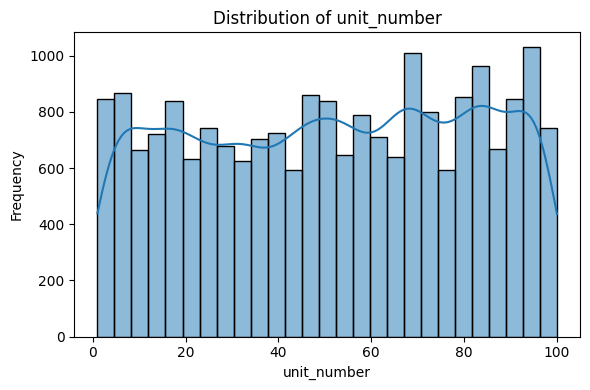

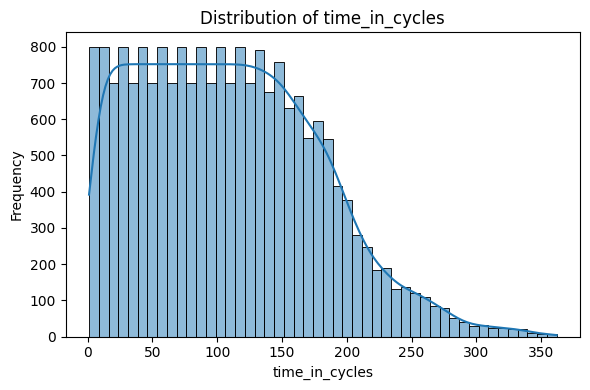

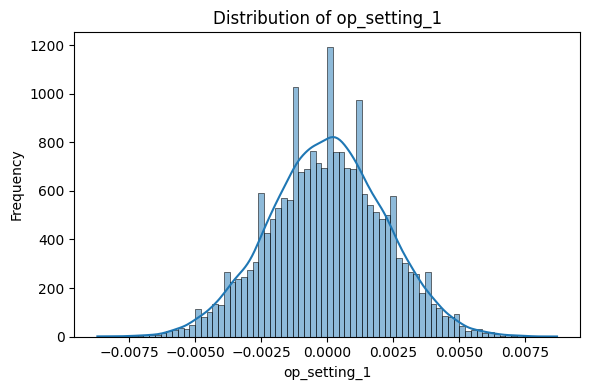

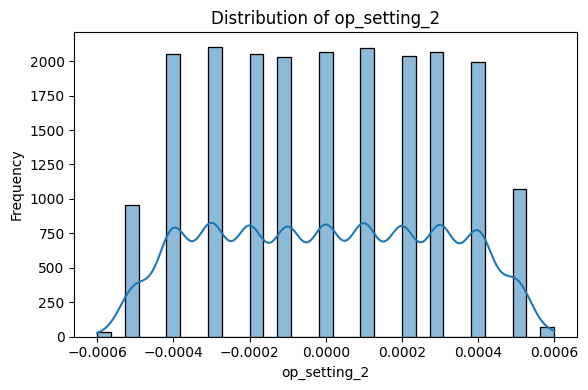

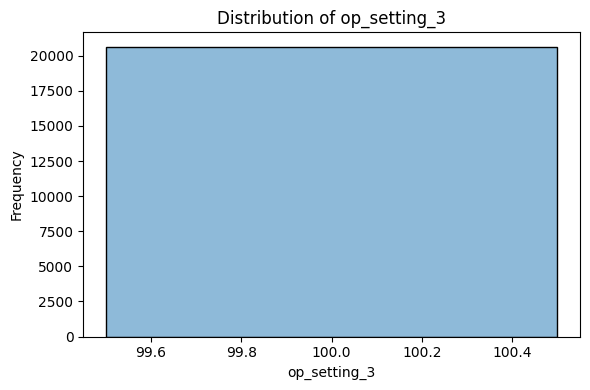

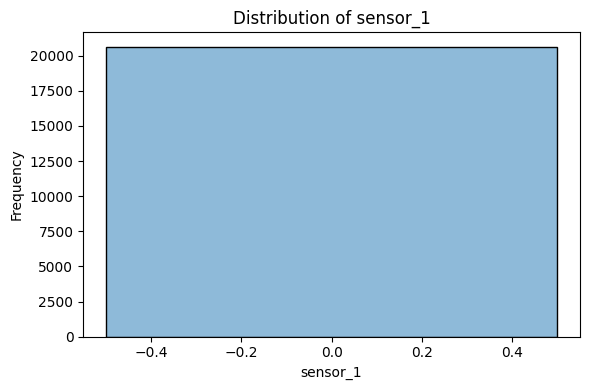

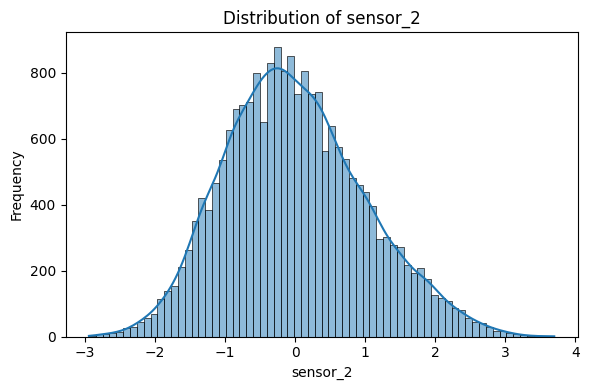

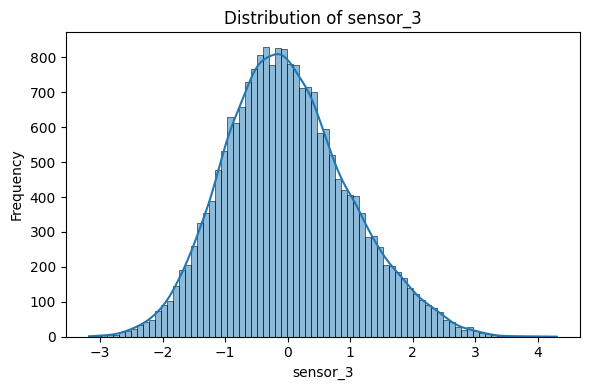

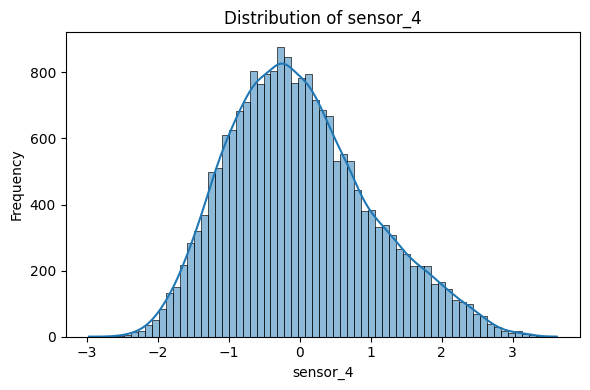

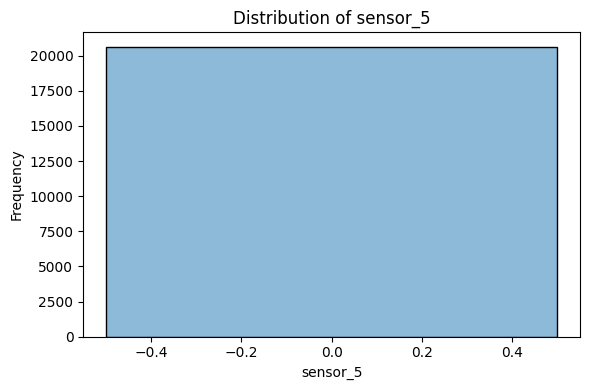

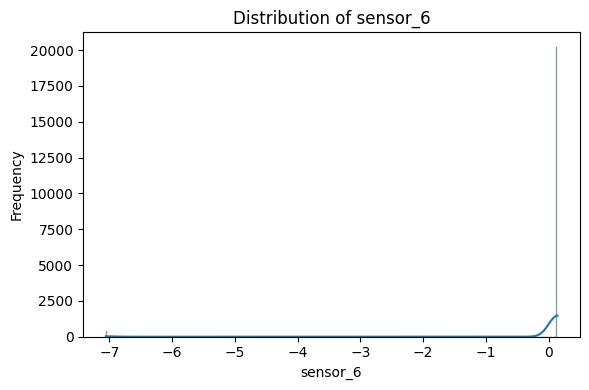

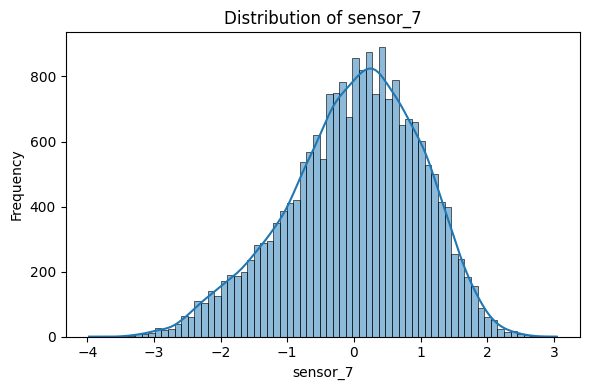

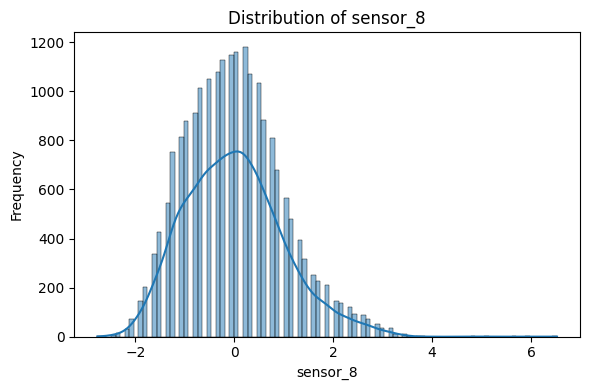

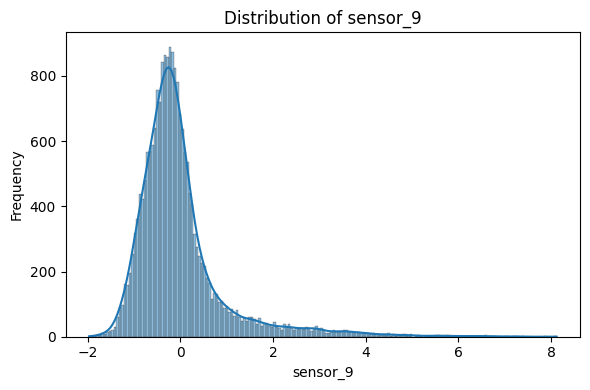

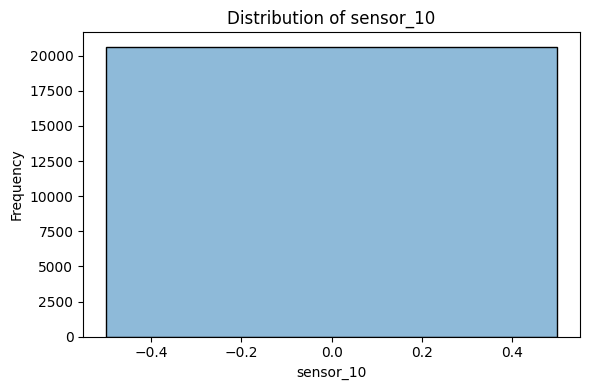

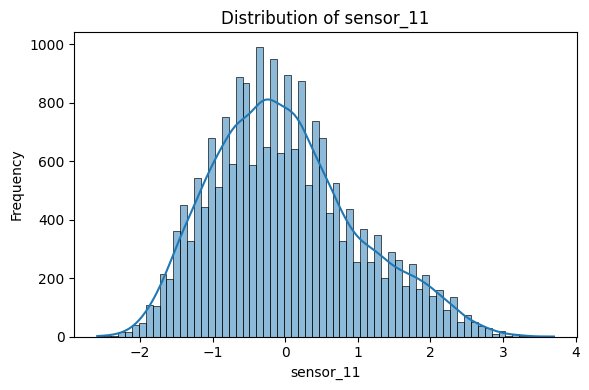

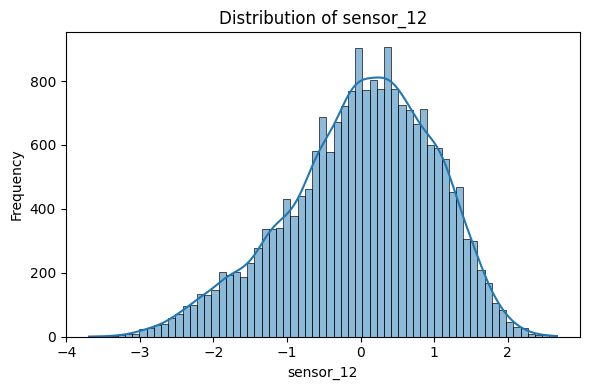

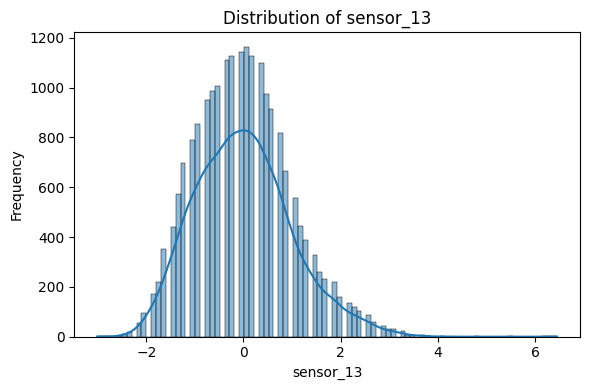

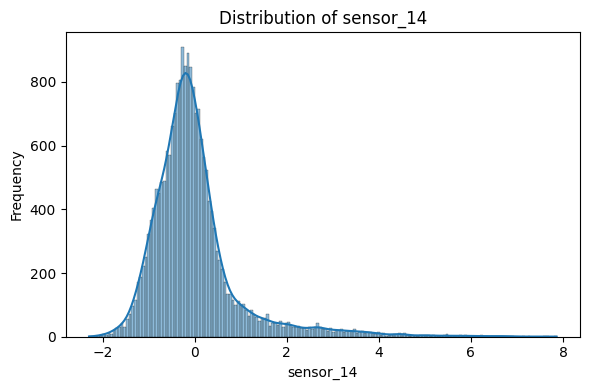

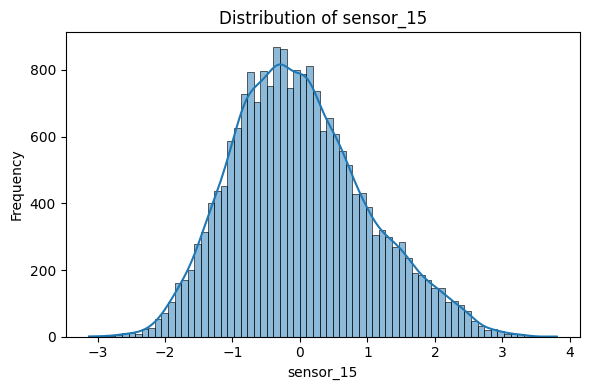

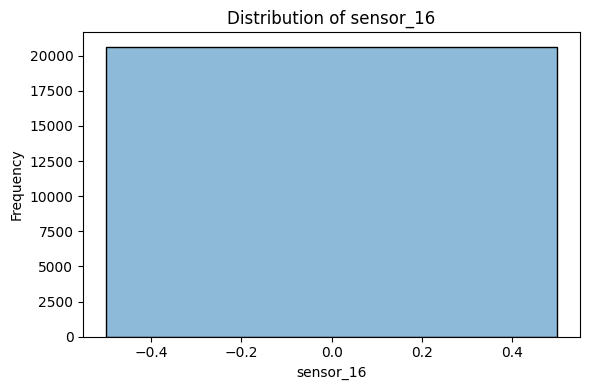

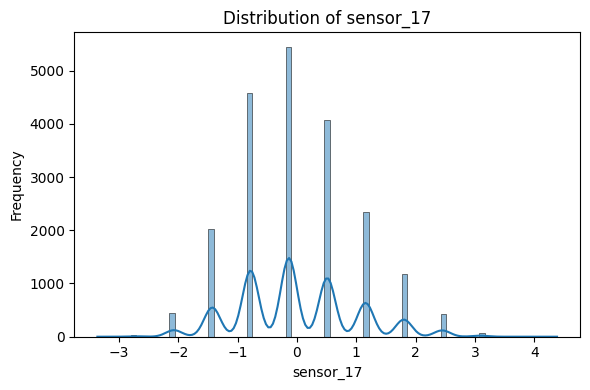

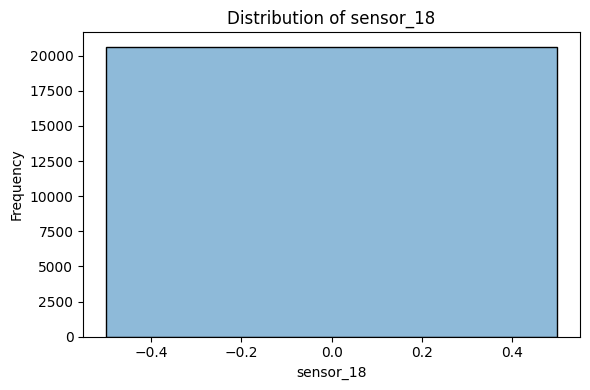

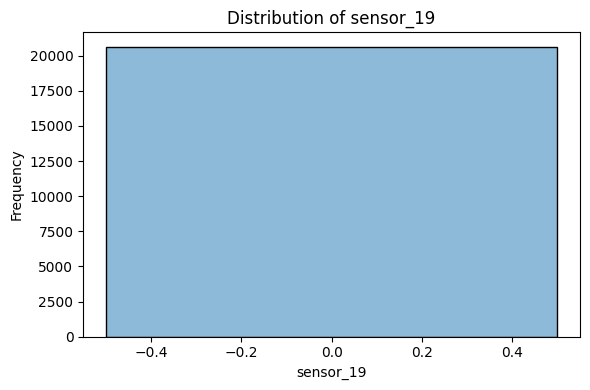

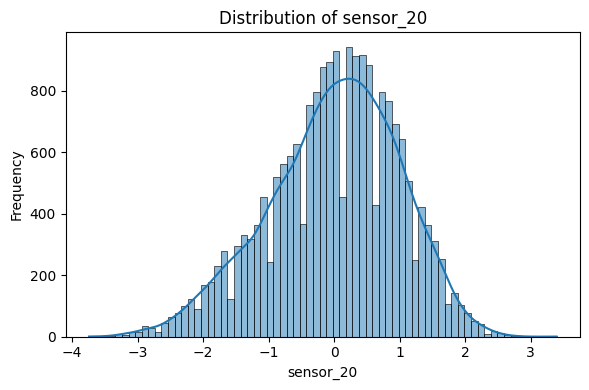

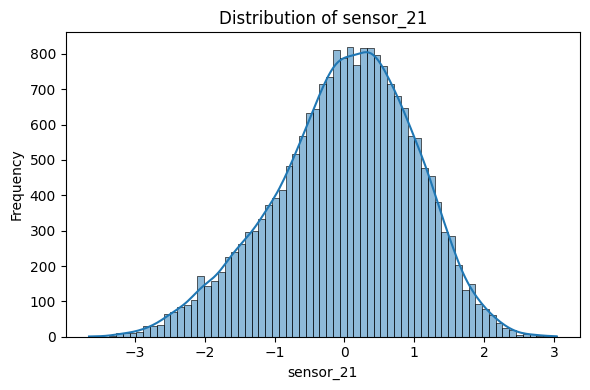

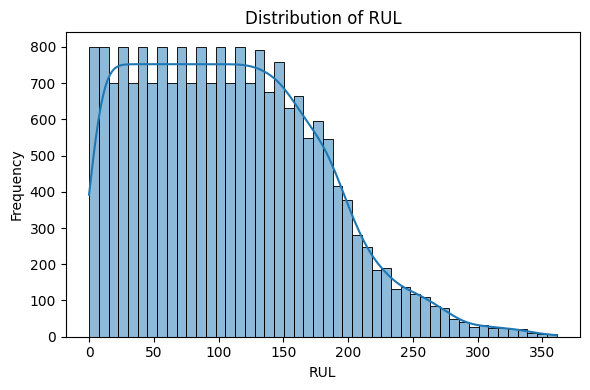

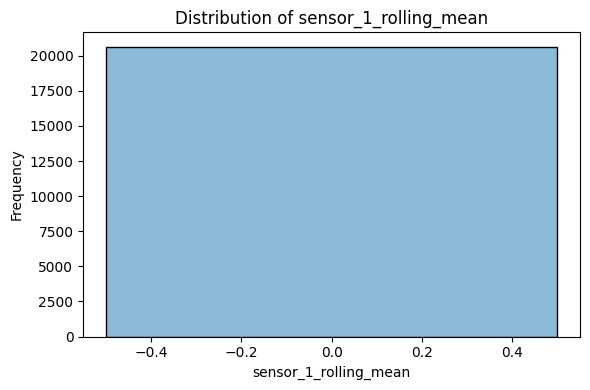

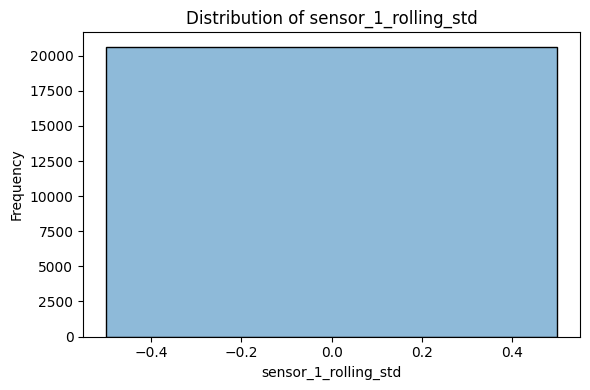

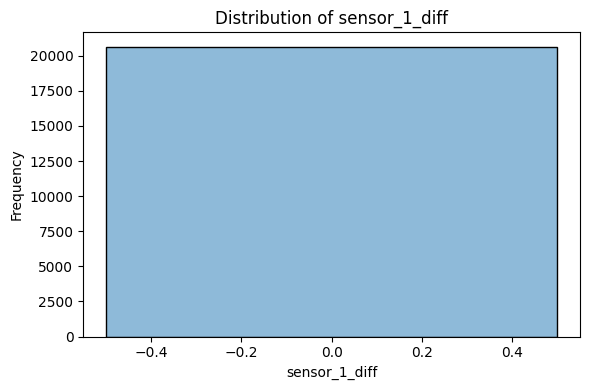

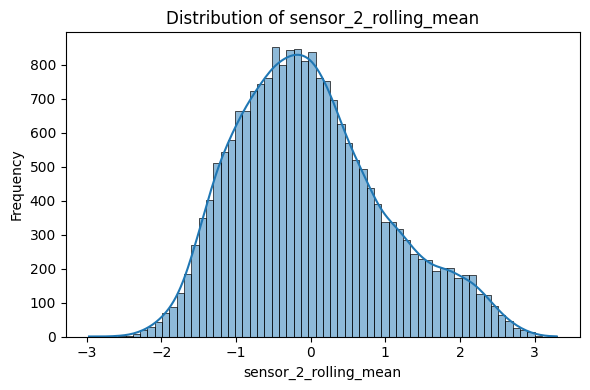

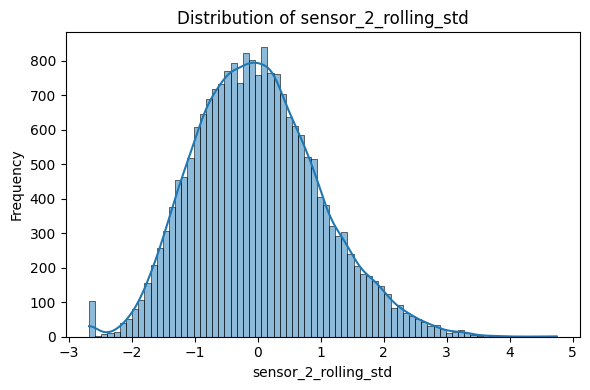

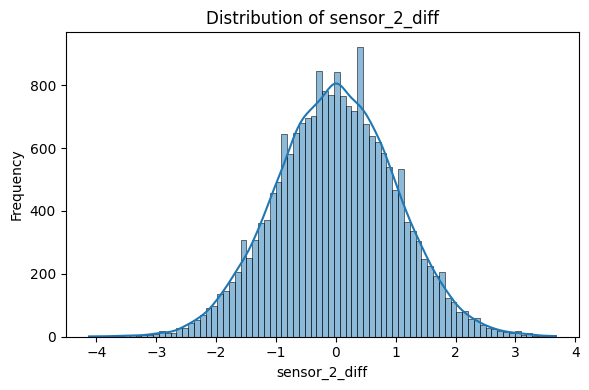

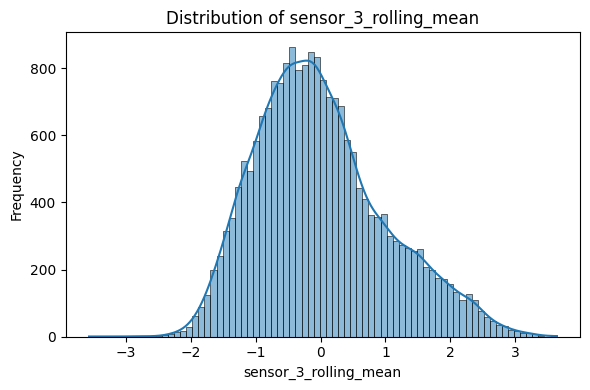

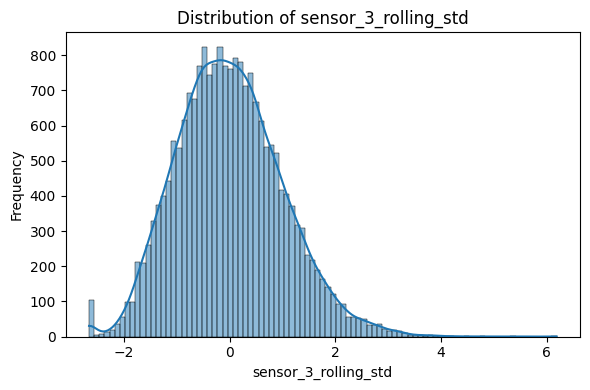

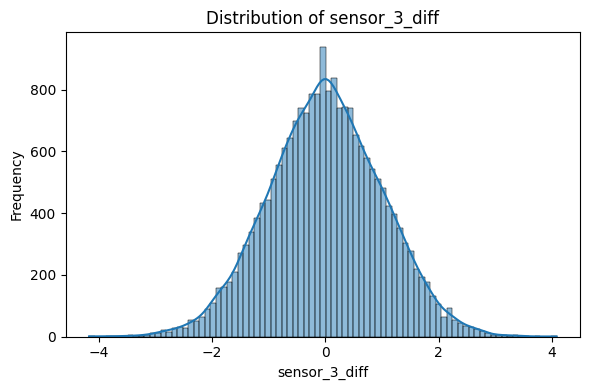

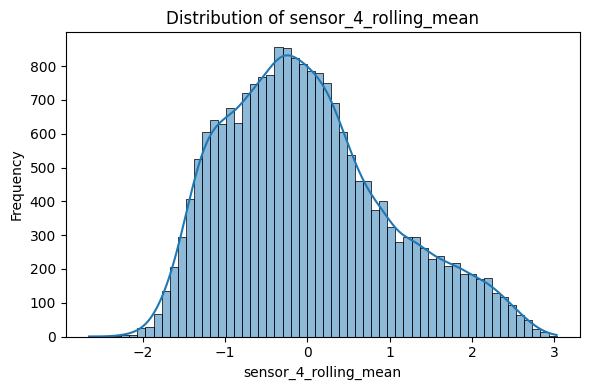

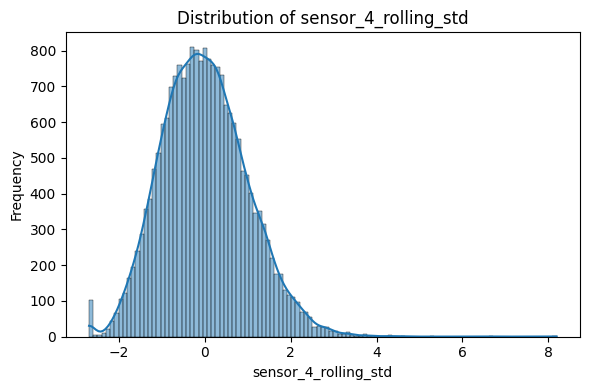

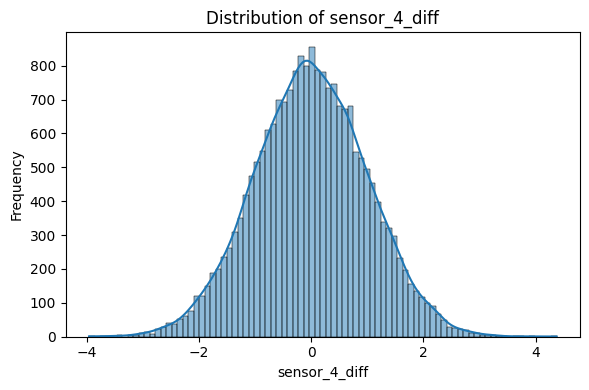

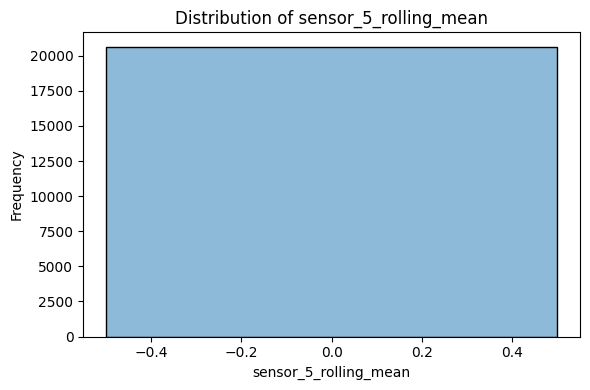

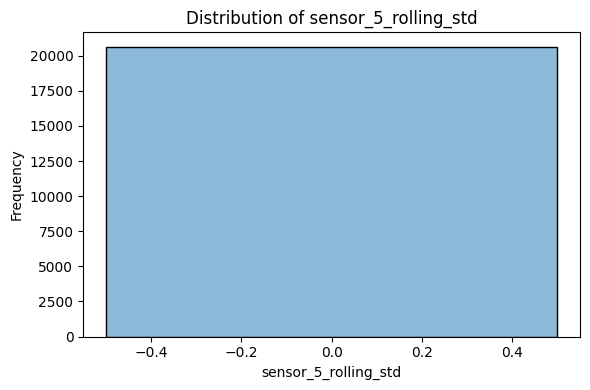

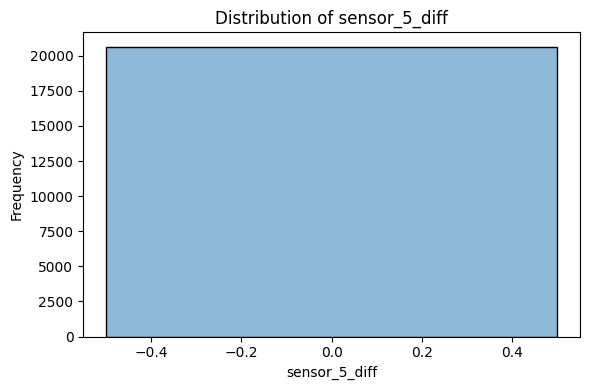

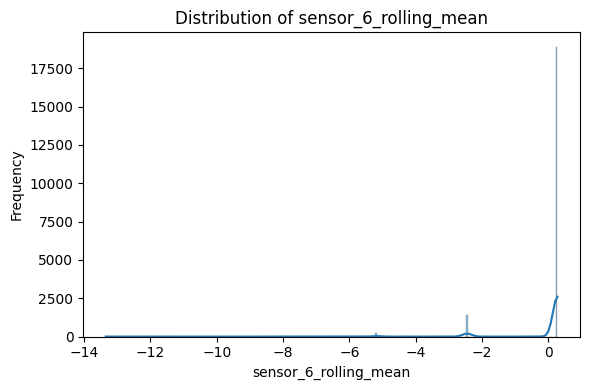

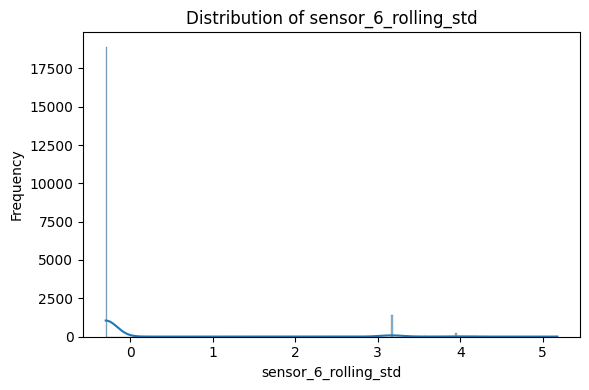

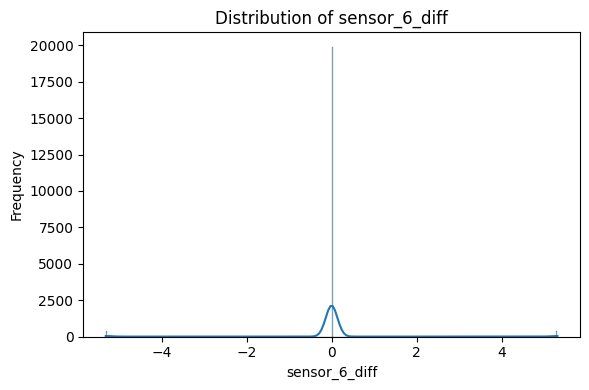

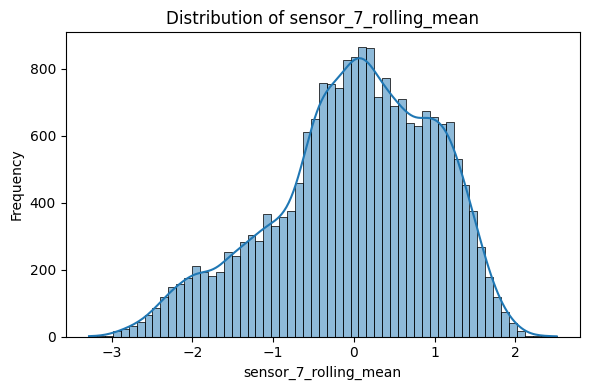

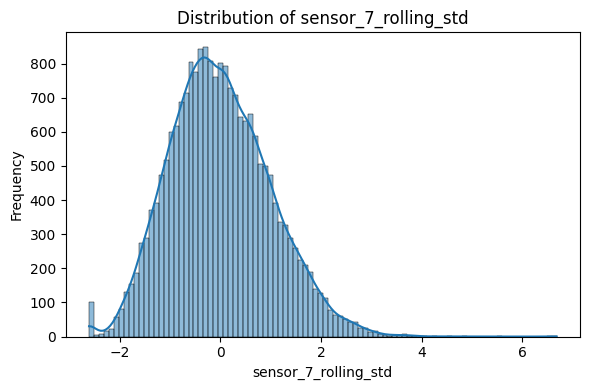

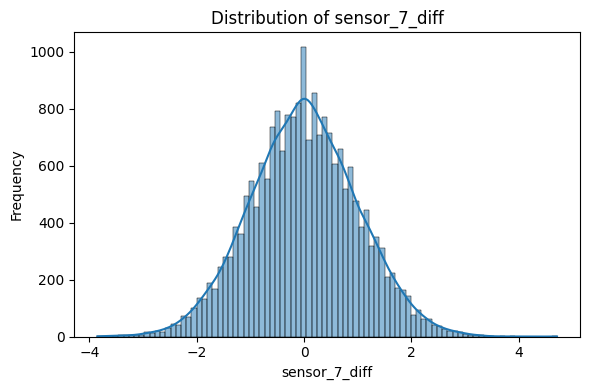

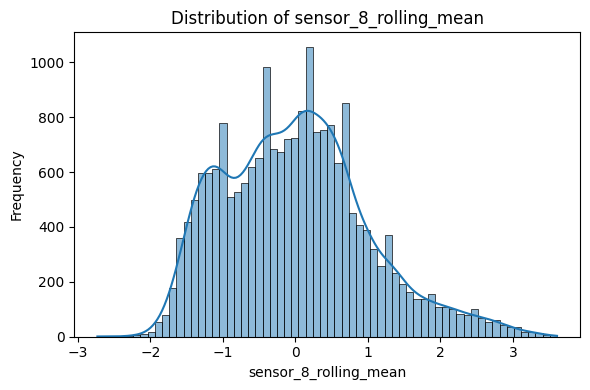

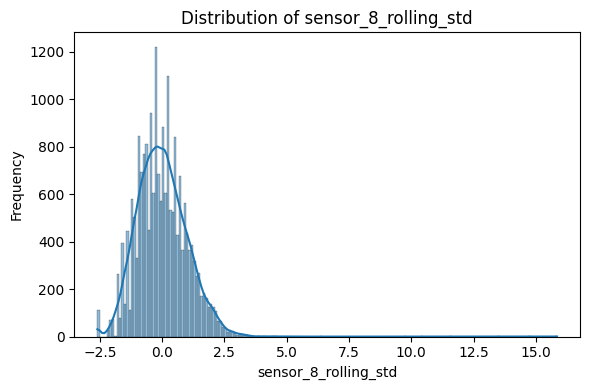

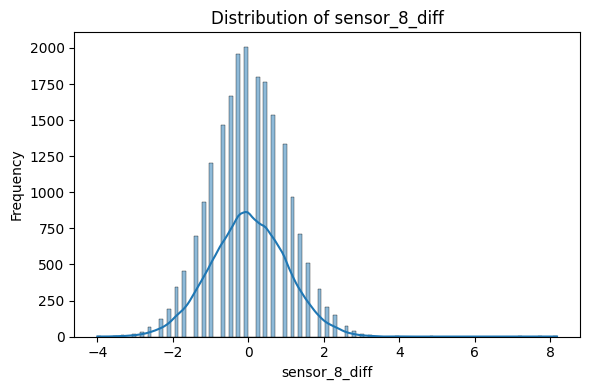

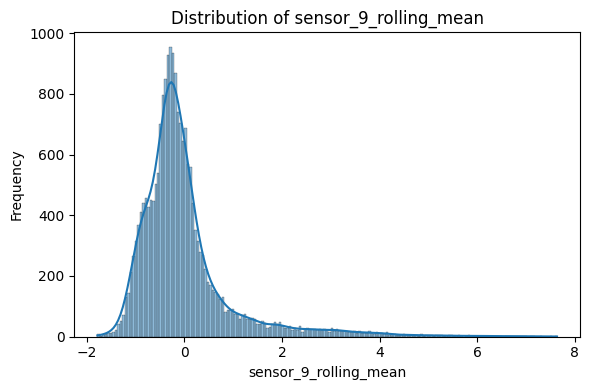

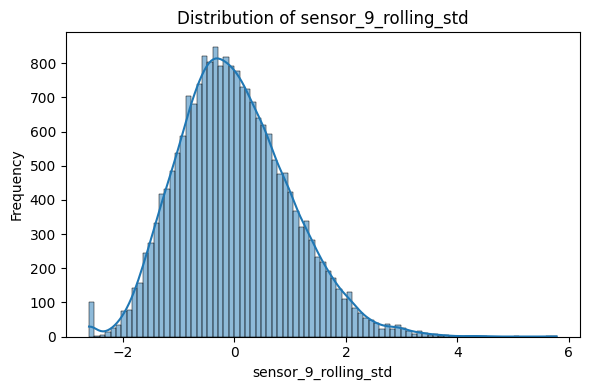

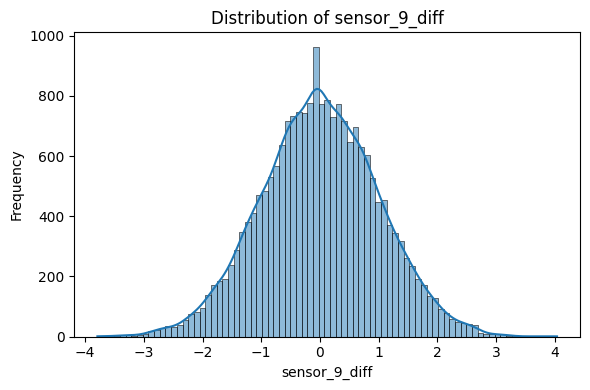

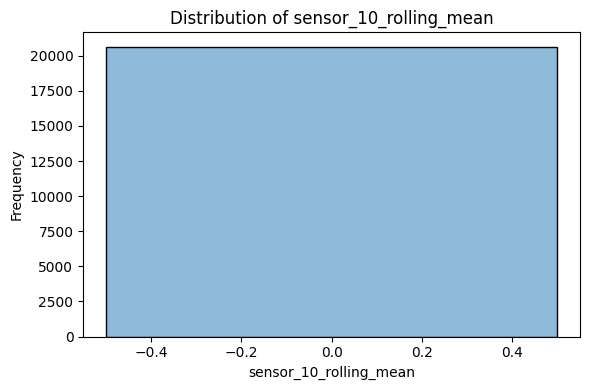

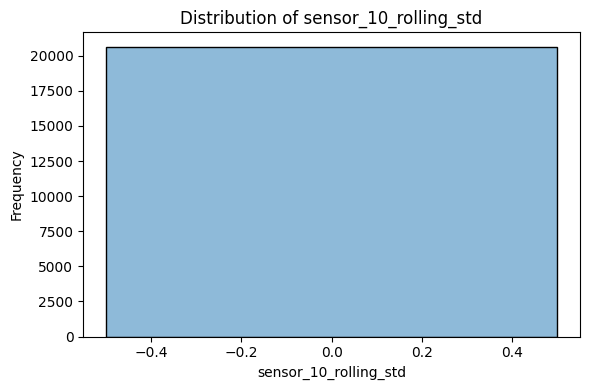

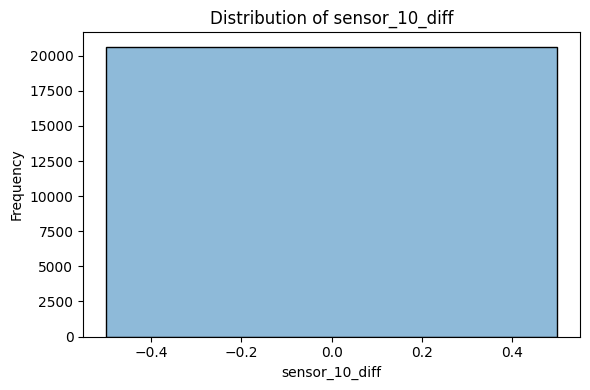

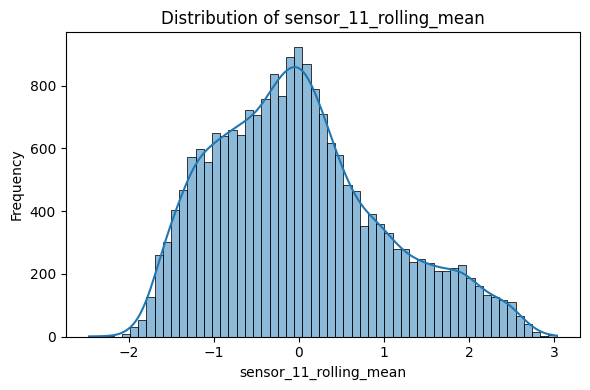

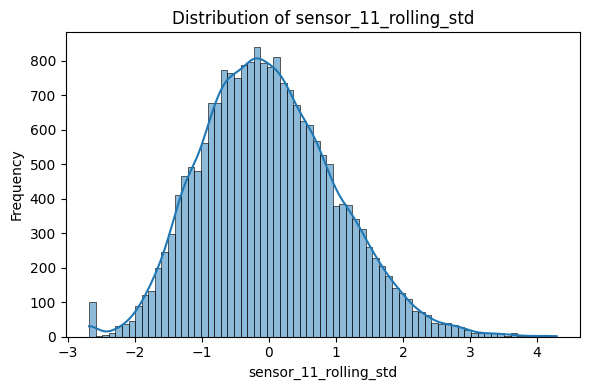

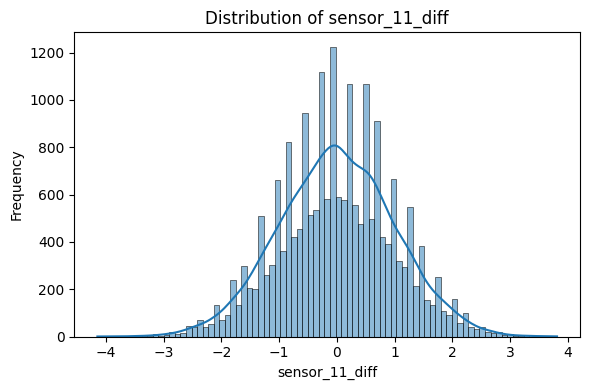

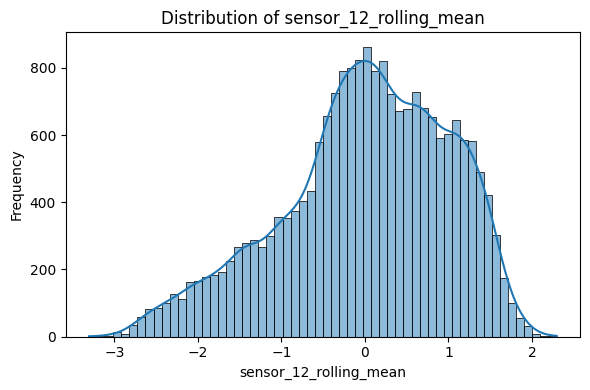

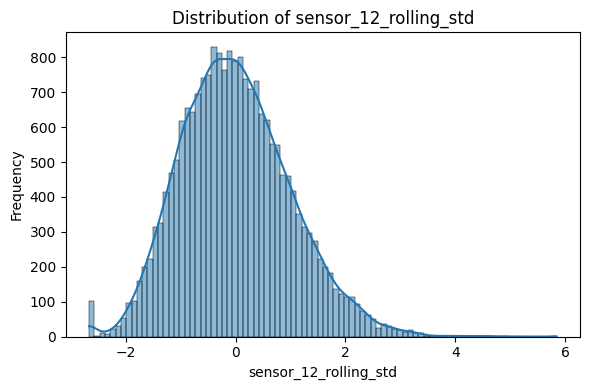

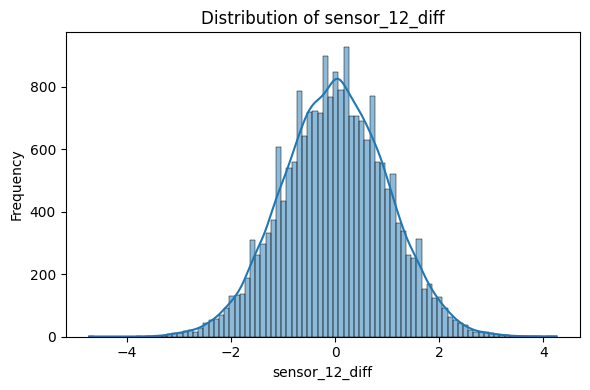

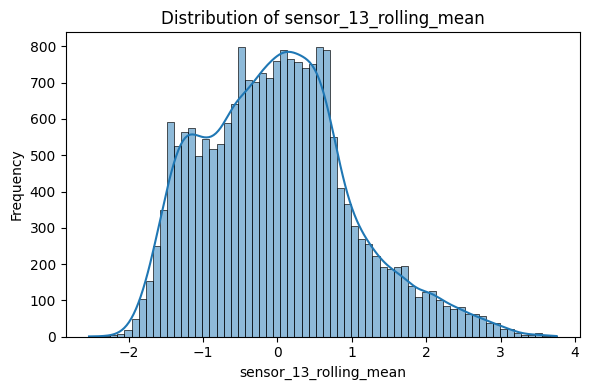

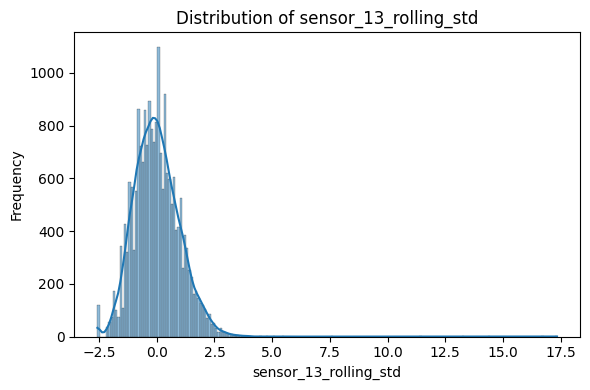

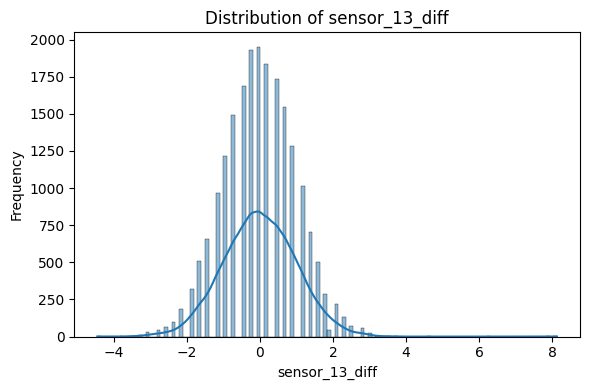

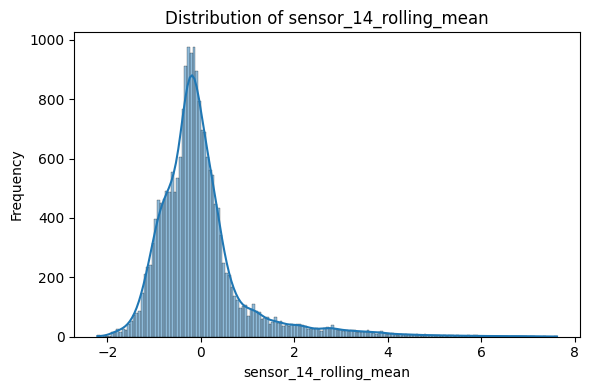

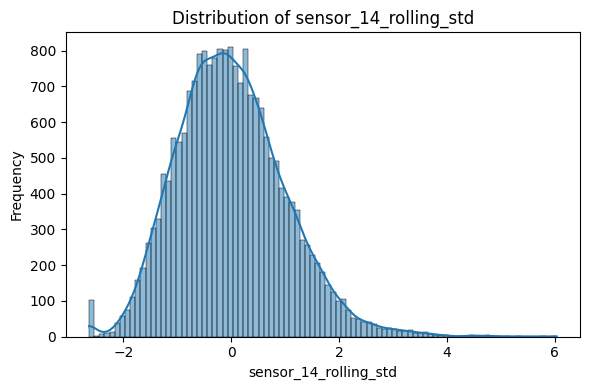

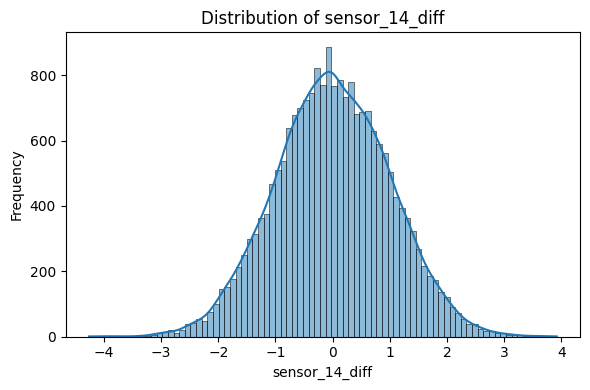

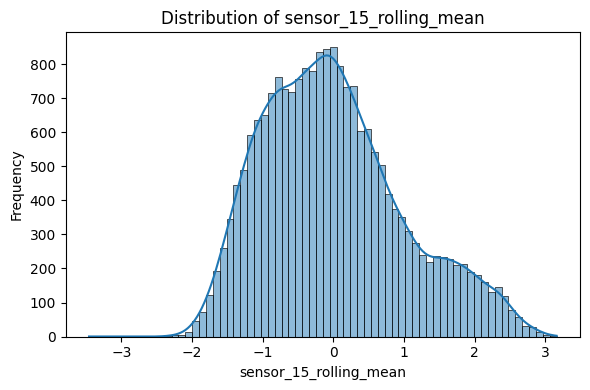

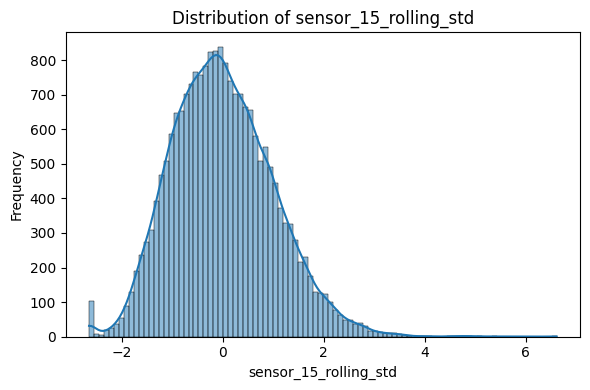

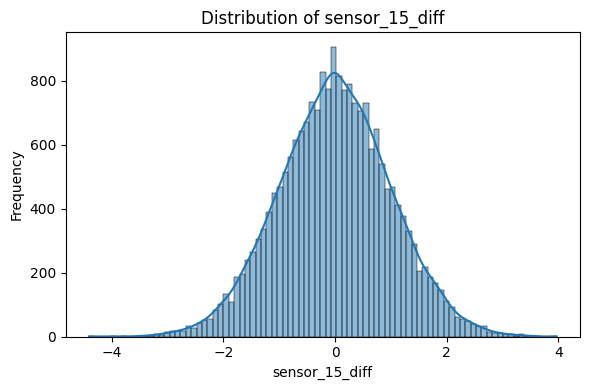

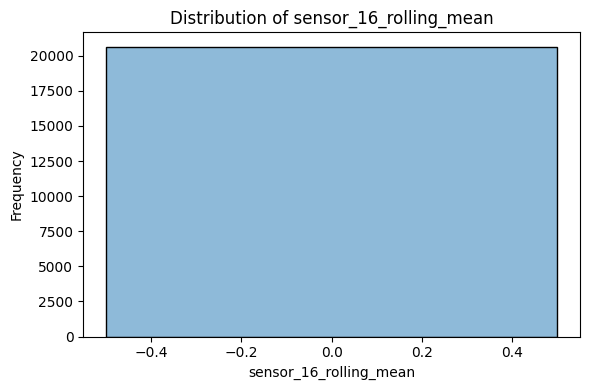

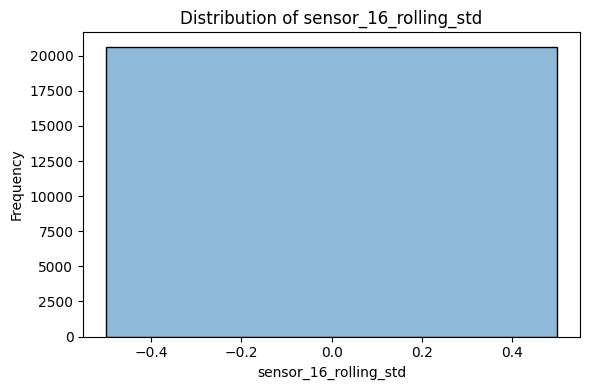

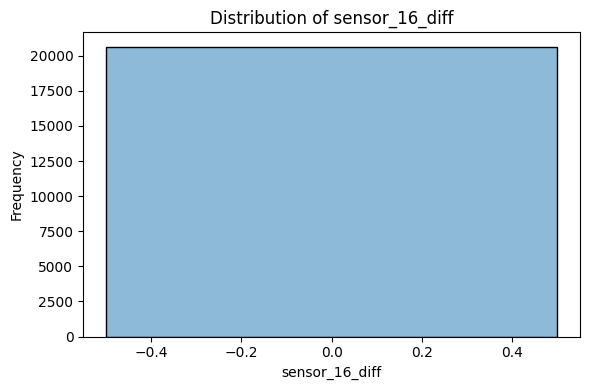

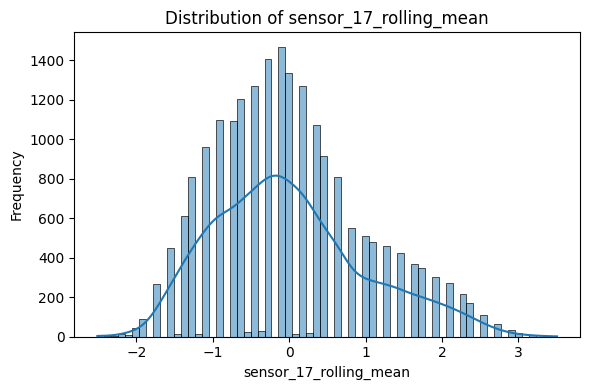

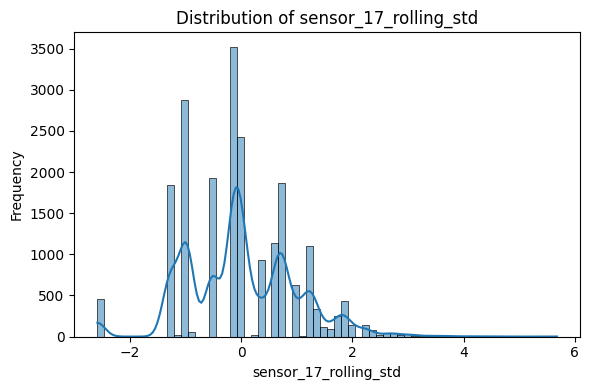

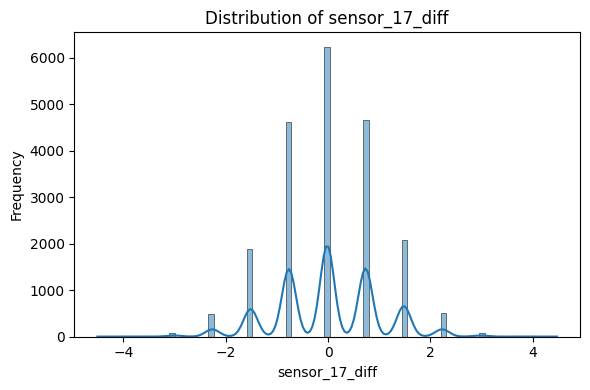

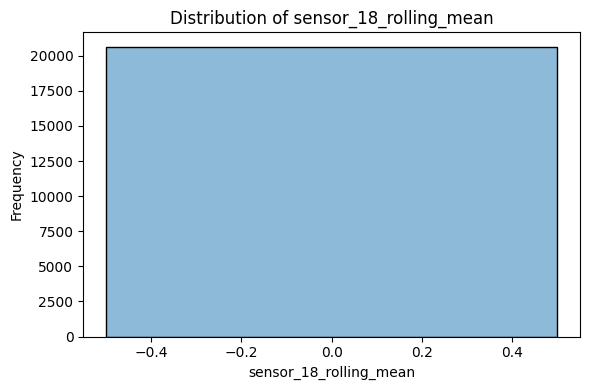

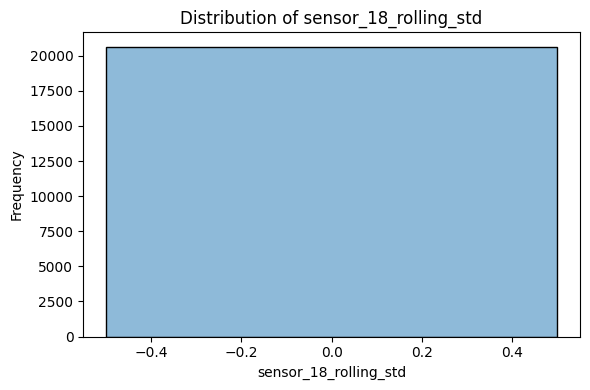

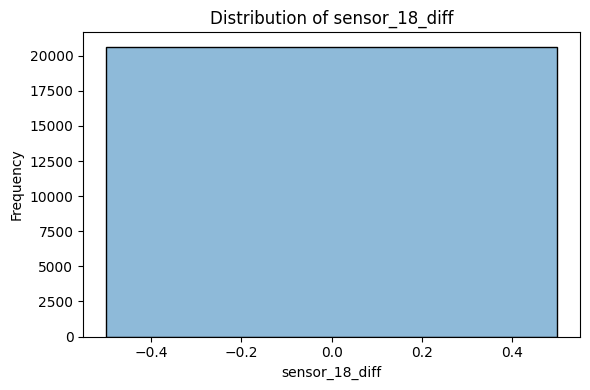

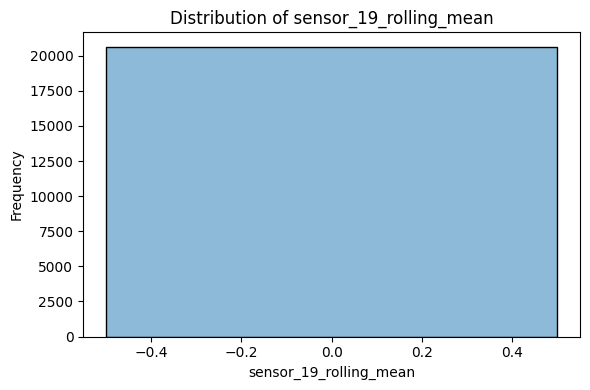

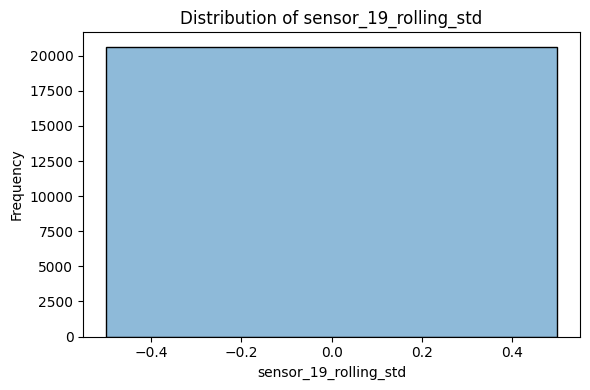

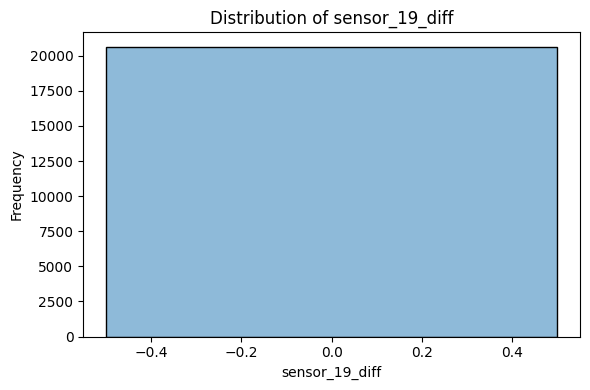

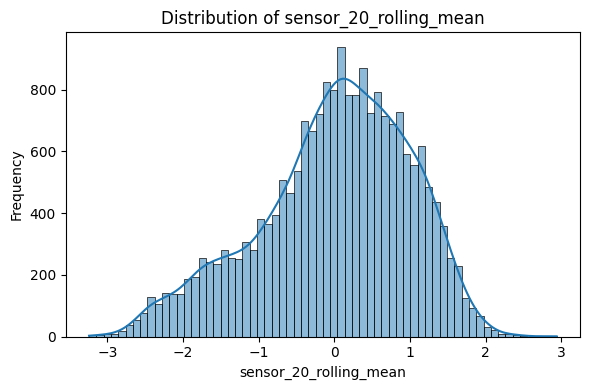

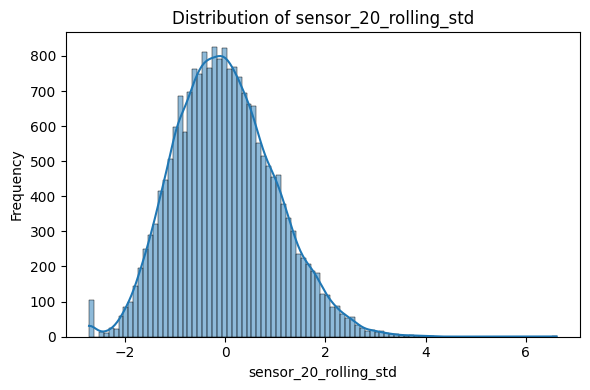

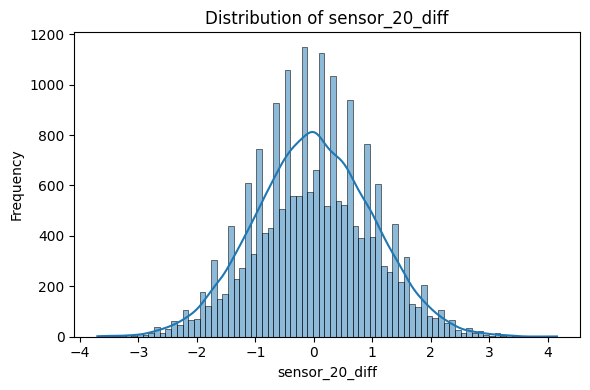

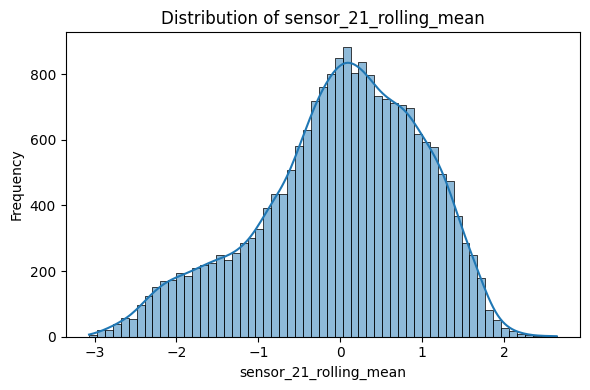

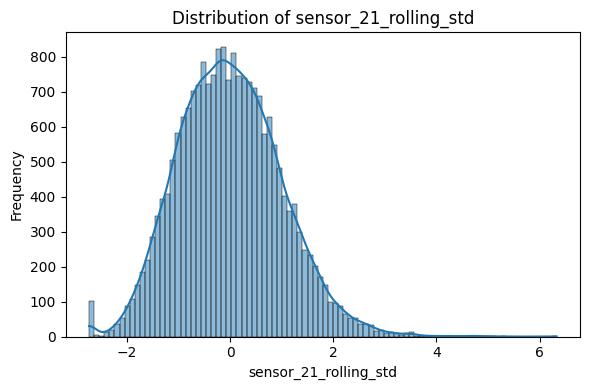

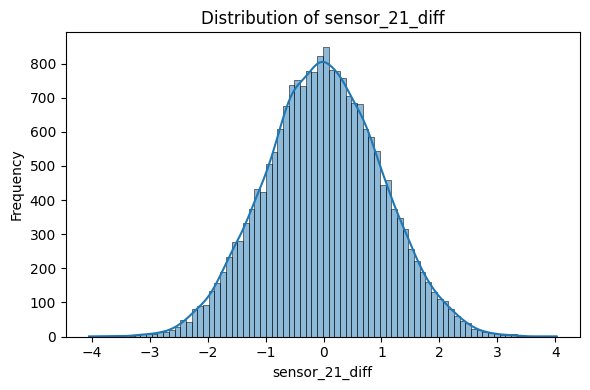

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df_1.select_dtypes(include='number').columns

# Plot histogram for each column
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_1[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


In [63]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Separate features & labels ----
train_X = train_df.drop(columns=['unit_number', 'time_in_cycles', 'RUL'])
train_y = train_df['RUL']

test_X = test_df.drop(columns=['unit_number', 'time_in_cycles', 'RUL'])
test_y = test_df['RUL']

# ---- Linear Regression ----
lr = LinearRegression()
lr.fit(train_X, train_y)
pred_lr = lr.predict(test_X)

# ---- Random Forest ----
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(train_X, train_y)
pred_rf = rf.predict(test_X)

# ---- Evaluation Function ----
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} → RMSE: {rmse:.2f}, MAE: {mae:.2f}")
    return rmse, mae

# ---- Results ----
rmse_lr, mae_lr = evaluate_model(test_y, pred_lr, "Linear Regression")
rmse_rf, mae_rf = evaluate_model(test_y, pred_rf, "Random Forest")

Linear Regression → RMSE: 37.45, MAE: 29.50
Random Forest → RMSE: 33.99, MAE: 24.23


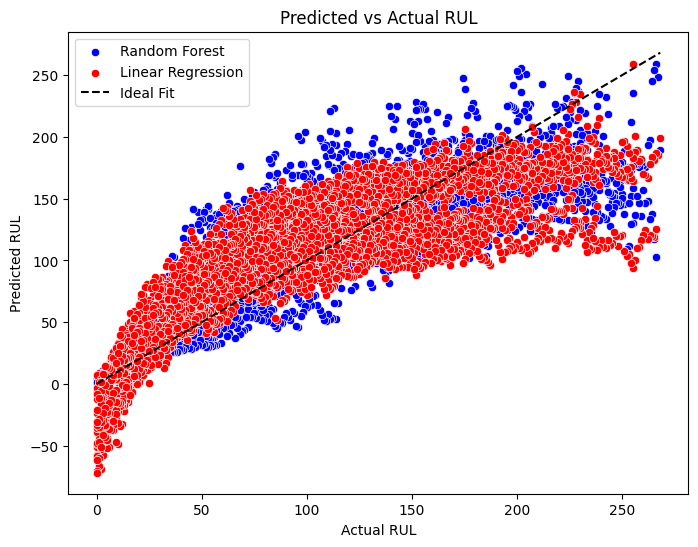

In [65]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=test_y, y=pred_rf, color='blue', label='Random Forest')
sns.scatterplot(x=test_y, y=pred_lr, color='red', label='Linear Regression')
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', label='Ideal Fit')
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.legend()
plt.title("Predicted vs Actual RUL")
plt.show()